<a href="https://colab.research.google.com/github/jemaaku96/deeplearning/blob/main/Handwritten_Numbers_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0         #Normalizing the data since the original is between 0 - 255 become 0 - 1
print("x_train.shape:", x_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
#Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),   # random, it is effective regularization technique that makes your neural networks more resilient and less prone to memorizing the training data
    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Compile the model
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [6]:
# Training the model
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8606 - loss: 0.4705 - val_accuracy: 0.9578 - val_loss: 0.1419
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9590 - loss: 0.1445 - val_accuracy: 0.9683 - val_loss: 0.1029
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9661 - loss: 0.1091 - val_accuracy: 0.9714 - val_loss: 0.0946
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9735 - loss: 0.0861 - val_accuracy: 0.9753 - val_loss: 0.0783
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9768 - loss: 0.0725 - val_accuracy: 0.9758 - val_loss: 0.0759
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9791 - loss: 0.0660 - val_accuracy: 0.9762 - val_loss: 0.0760
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9828 - loss: 0.0548 - val_accuracy: 0.9759 - val_loss: 0.0774
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9837 - loss: 0.050

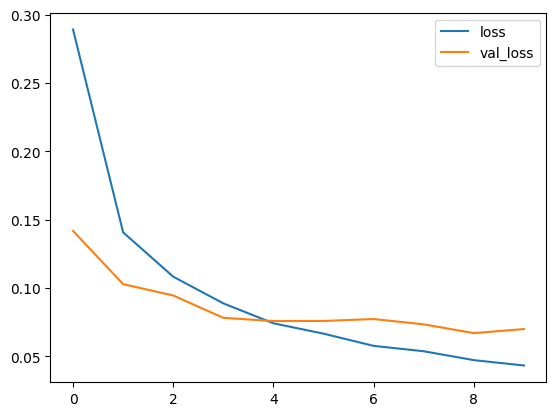

In [10]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history["val_loss"], label = 'val_loss')
plt.legend()

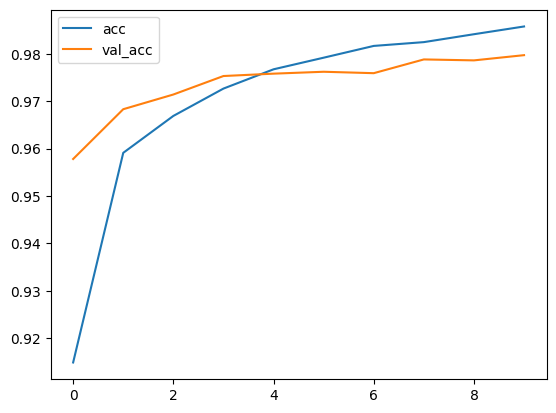

In [11]:
plt.plot(r.history["accuracy"], label = "acc")
plt.plot(r.history["val_accuracy"], label = "val_acc")
plt.legend()

In [12]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9750 - loss: 0.0854


[0.0700511485338211, 0.9797000288963318]

In [13]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [28]:
y_pred = np.argmax(y_pred, axis = 1)

In [30]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Confusion matrix:
[[ 974    0    1    0    0    2    1    1    1    0]
 [   0 1127    3    1    0    1    1    0    2    0]
 [   3    1 1002    9    1    0    2    6    6    2]
 [   1    0    1  994    1    3    0    6    2    2]
 [   2    0    4    0  967    1    3    2    2    1]
 [   2    0    0   11    1  868    4    1    3    2]
 [   5    2    1    0    5    3  936    1    5    0]
 [   0    3    8    2    1    0    0 1006    4    4]
 [   5    0    1    7    5    2    1    6  947    0]
 [   1    2    1    6   15    1    0    5    2  976]]


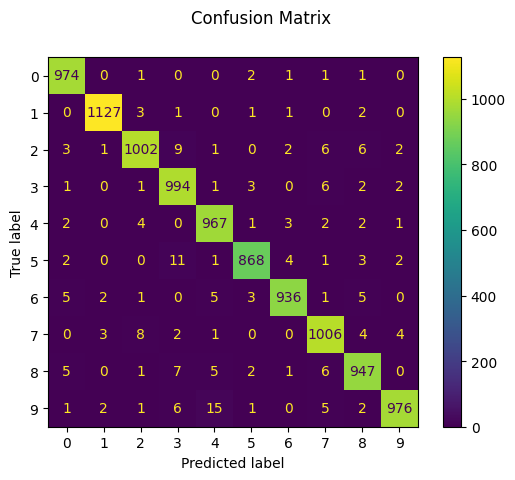

In [31]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

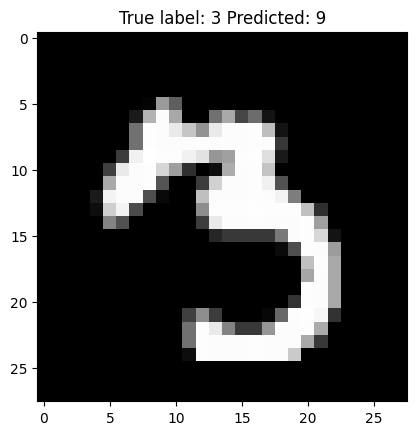

In [44]:
# Show some misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title(f"True label: {y_test[i]} Predicted: {y_pred[i]}");